# Weight Surgery Visualizations

> Visualizing the Weight Surgery technique on artificial data to illustrate its effect

In [ ]:
#| default_exp artificial_visualization

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize


def artificial_cluster(x, y, z, normed=False, count=200):
    lengths = np.random.rand(count, 1) * 1.5
    x = np.random.normal((x, y, z), 0.07, (count, 3))
    x *= lengths
    return normalize(x) if normed else x


class FeatureSpaceFigure(object):
    def __init__(self, lim=None):
        self.fig: plt.Figure = plt.figure()
        self.ax: Axes3D = self.fig.add_subplot(projection='3d', box_aspect=(1, 1, 1))
        if lim:
            self.ax.set_xlim(-lim, lim)
            self.ax.set_ylim(-lim, lim)
            self.ax.set_zlim(-lim, lim)

    def plot_sphere(self, equatorial_plane=False):
        phi, theta = np.mgrid[0.0:np.pi:100j, 0.0:2.0*np.pi:100j]
        x = np.sin(phi)*np.cos(theta)
        y = np.sin(phi)*np.sin(theta)
        z = np.cos(phi)

        self.ax.plot_surface(x, y, z, rcount=20, ccount=20, alpha=.3, color='white')

        if equatorial_plane:
            self.ax.plot_surface(x, y, 0*z, rcount=20, ccount=20, alpha=.15, color='white')

    def _scatter(self, points, color, s):
        self.ax.scatter(*points.transpose(), s=s, color=color)

    def plot_cluster(self, points, color, plot_projection=False, s=1):
        self._scatter(points, color, s)
        if not plot_projection:
            return

        dir = normalize(normalize(points).mean(axis=0).reshape(1, -1)).reshape(-1)
        arrow_dir = -np.sign(dir[2])
        arrow_length = abs(dir[2])
        self.ax.quiver(*dir, 0, 0, arrow_dir, length=arrow_length, color=color, arrow_length_ratio=0.2/arrow_length)

        points[:, 2] = 0
        self._scatter(points, color, s)

# Shattered Class

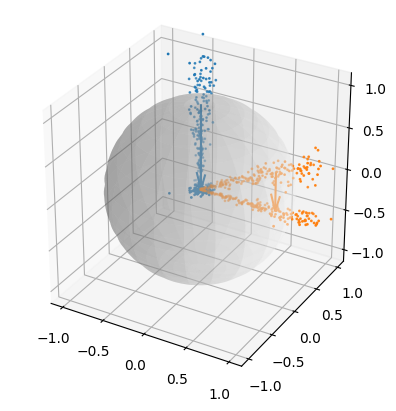

In [ ]:
fig = FeatureSpaceFigure(1.1)

fig.plot_sphere()

fig.plot_cluster(artificial_cluster(0, 0, 1), '#1f77b4', True)

z = np.sqrt(.2)
fig.plot_cluster(artificial_cluster(np.sqrt(1-z**2), 0, z), '#ff7f0e', True)

# Merged Classes

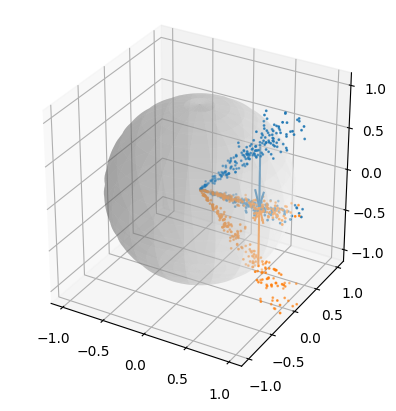

In [ ]:
fig = FeatureSpaceFigure(1.1)

fig.plot_sphere()

z = np.sqrt(.5)
fig.plot_cluster(artificial_cluster(np.sqrt(1-z**2), 0, z), '#1f77b4', True)
fig.plot_cluster(artificial_cluster(np.sqrt(1-z**2), 0, -z), '#ff7f0e', True)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()